<a href="https://colab.research.google.com/github/bruno774/mestrado/blob/master/AlemDaPena_p3_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## preliminaries

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data_src = pd.read_pickle('alemPena-p2.pickle')

In [ ]:
# just checking
data_src.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 180 to 881
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GeneroReu           606 non-null    int64  
 1   Reclusao            606 non-null    int64  
 2   Detencao            606 non-null    int64  
 3   Multa               606 non-null    int64  
 4   CulpabCirc          606 non-null    int64  
 5   AntecedCirc         606 non-null    int64  
 6   CondSocialCirc      606 non-null    int64  
 7   PersonCirc          606 non-null    int64  
 8   MotivosCirc         606 non-null    int64  
 9   CircCrimeCirc       606 non-null    int64  
 10  ConseqCrimeCirc     606 non-null    int64  
 11  ComportVitimaCirc   606 non-null    int64  
 12  CircReincidencia    606 non-null    int64  
 13  PenaMinLegal        606 non-null    int64  
 14  Ano-norm            606 non-null    float64
 15  ReclusaoDias-norm   606 non-null    float64
 16  MultaD

## train-test split

In [ ]:
# other class to test: CondSocialCirc GeneroReu
classe = 'CondSocialCirc'

In [ ]:
X = data_src.drop(columns=[classe]).values
y = data_src[classe].values

In [ ]:
X.shape

(606, 29)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((424, 29), (182, 29), (424,), (182,))

validacao de elementos unicos?

In [ ]:
_, counts_elements_train = np.unique(y_train, return_counts=True)
_, counts_elements_test = np.unique(y_test, return_counts=True)

In [ ]:
counts_elements_train

array([350,  74])

In [ ]:
counts_elements_test

array([152,  30])

## Naive Bayes

### Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
maxIter = 30
ext=[0.0]*maxIter
acc=[0.0]*maxIter
f1s=[0.0]*maxIter
mcc=[0.0]*maxIter

for i in range(maxIter):

    t0 = time.time()
    model = GaussianNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    t1 = time.time()

    ext[i]=(t1-t0)
    acc[i] = metrics.accuracy_score(y_test, y_pred)
    f1s[i] = metrics.f1_score(y_test, y_pred)
    mcc[i] = metrics.matthews_corrcoef(y_test, y_pred)

In [ ]:
model.class_count_, model.class_prior_, model.priors, model.epsilon_

(array([400.,  24.]),
 array([0.94339623, 0.05660377]),
 None,
 2.499499377002493e-10)

In [ ]:
model.get_params

<bound method BaseEstimator.get_params of GaussianNB(priors=None, var_smoothing=1e-09)>

#### performance evaluation

In [ ]:
print('Naive Bayes (gaussian) performance results for class',classe)
print("ExecTime mean:",np.mean(ext))
print("Accuracy mean:",np.mean(acc))
print("F1-Score mean:",np.mean(f1s))
print("Matthews Correlation mean: ",np.mean(mcc))

print("ExecTime median:",np.median(ext))
print("Accuracy median:",np.median(acc))
print("F1-Score median:",np.median(f1s))
print("Matthews Correlation median:",np.median(mcc))

print("ExecTime Std:",np.std(ext))
print("Accuracy Std:",np.std(acc))
print("F1-Score Std:",np.std(f1s))
print("Matthews Correlation Std:",np.std(mcc))

Naive Bayes (gaussian) performance results for class CondSocialCirc
ExecTime mean: 0.0009872754414876302
Accuracy mean: 0.24725274725274726
F1-Score mean: 0.2974358974358975
Matthews Correlation mean:  0.0917117519127686
ExecTime median: 0.0009115934371948242
Accuracy median: 0.24725274725274726
F1-Score median: 0.29743589743589743
Matthews Correlation median: 0.0917117519127686
ExecTime Std: 0.0002327899026808865
Accuracy Std: 0.0
F1-Score Std: 5.551115123125783e-17
Matthews Correlation Std: 0.0


In [ ]:
metrics.confusion_matrix(y_test,y_pred).T

array([[ 16,   1],
       [136,  29]])

In [ ]:
print(ext, '\n', acc,'\n',f1s,'\n', mcc)

[0.0018279552459716797, 0.0011436939239501953, 0.0010306835174560547, 0.0019960403442382812, 0.0010328292846679688, 0.0010347366333007812, 0.0009367465972900391, 0.001024484634399414, 0.0009763240814208984, 0.001001596450805664, 0.0010433197021484375, 0.0009899139404296875, 0.0010027885437011719, 0.0009989738464355469, 0.0009615421295166016, 0.0010058879852294922, 0.000946044921875, 0.0008981227874755859, 0.0008928775787353516, 0.0008795261383056641, 0.0009267330169677734, 0.0008914470672607422, 0.0009539127349853516, 0.0009145736694335938, 0.0009577274322509766, 0.000904083251953125, 0.0009331703186035156, 0.0008928775787353516, 0.0009093284606933594, 0.0008993148803710938] 
 [0.3131868131868132, 0.3131868131868132, 0.3131868131868132, 0.3131868131868132, 0.3131868131868132, 0.3131868131868132, 0.3131868131868132, 0.3131868131868132, 0.3131868131868132, 0.3131868131868132, 0.3131868131868132, 0.3131868131868132, 0.3131868131868132, 0.3131868131868132, 0.3131868131868132, 0.31318681318

In [ ]:
from matplotlib import rcParams

default_font_size = rcParams['font.size']
rcParams['font.size'] = 20
rcParams['axes.labelsize']=20
rcParams['axes.titlesize']=20
rcParams['figure.figsize'] =(5.0, 5.5)

# ['Male','Female'] ou ['No','Yes']
categ = ['No','Yes']

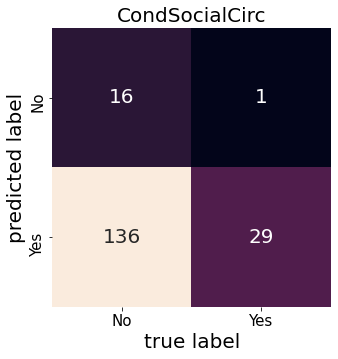

In [ ]:
mat = metrics.confusion_matrix(y_test, y_pred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=categ, yticklabels=categ)

plt.tick_params(labelsize=15)
plt.title(classe)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.show()

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True, normalize=True)

Predicted,0,1,All
True,,,
0,0.263736,0.648352,0.912088
1,0.038462,0.049451,0.087912
All,0.302198,0.697802,1.000000


#### ROC Curve

search or discard??

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)


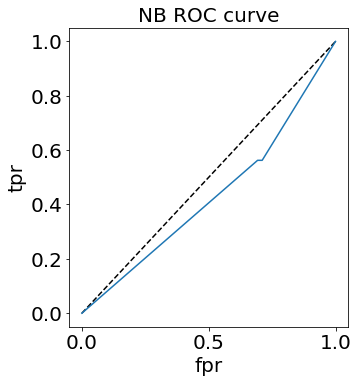

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('NB ROC curve')
plt.show()

In [ ]:
#Area under ROC curve

metrics.roc_auc_score(y_test,y_pred_proba)

0.43091114457831325

### Multinomial

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
maxIter = 30
ext=[0.0]*maxIter
acc=[0.0]*maxIter
f1s=[0.0]*maxIter
mcc=[0.0]*maxIter

for i in range(maxIter):

    t0 = time.time()

    model = MultinomialNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    t1 = time.time()

    ext[i]=(t1-t0)
    acc[i] = metrics.accuracy_score(y_test, y_pred)
    f1s[i] = metrics.f1_score(y_test, y_pred)
    mcc[i] = metrics.matthews_corrcoef(y_test, y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classific

#### performance evaluation

In [ ]:
print('Naive Bayes (multinomial) performance results for class',classe)
print("ExecTime mean:",np.mean(ext))
print("Accuracy mean:",np.mean(acc))
print("F1-Score mean:",np.mean(f1s))
print("Matthews Correlation mean:",np.mean(mcc))

print("ExecTime median:",np.median(ext))
print("Accuracy median:",np.median(acc))
print("F1-Score median:",np.median(f1s))
print("Matthews Correlation median:",np.median(mcc))

print("ExecTime Std:",np.std(ext))
print("Accuracy Std:",np.std(acc))
print("F1-Score Std:",np.std(f1s))
print("Matthews Correlation Std:",np.std(mcc))

Naive Bayes (multinomial) performance results for class GeneroReu
ExecTime mean: 0.0008646885553995769
Accuracy mean: 0.9285714285714283
F1-Score mean: 0.0
Matthews Correlation mean: 0.0
ExecTime median: 0.0007159709930419922
Accuracy median: 0.9285714285714286
F1-Score median: 0.0
Matthews Correlation median: 0.0
ExecTime Std: 0.0003608508773676107
Accuracy Std: 3.3306690738754696e-16
F1-Score Std: 0.0
Matthews Correlation Std: 0.0


In [ ]:
print(ext, '\n', acc,'\n',f1s,'\n', mcc)

[0.0016894340515136719, 0.0019421577453613281, 0.0016736984252929688, 0.00170135498046875, 0.0009899139404296875, 0.0006909370422363281, 0.0006947517395019531, 0.0006506443023681641, 0.0007228851318359375, 0.0006875991821289062, 0.0007085800170898438, 0.0007507801055908203, 0.0006461143493652344, 0.0006759166717529297, 0.0007693767547607422, 0.0007569789886474609, 0.0007259845733642578, 0.0008344650268554688, 0.0007393360137939453, 0.0007090568542480469, 0.0007770061492919922, 0.0006589889526367188, 0.0006544589996337891, 0.0006775856018066406, 0.0006546974182128906, 0.0006334781646728516, 0.0010268688201904297, 0.0007076263427734375, 0.0007255077362060547, 0.0006644725799560547] 
 [0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.928571

In [ ]:
metrics.confusion_matrix(y_test, y_pred).T

array([[169,  13],
       [  0,   0]])

In [ ]:
from matplotlib import rcParams

default_font_size = rcParams['font.size']
rcParams['font.size'] = 20
rcParams['axes.labelsize']=20
rcParams['axes.titlesize']=20
rcParams['figure.figsize'] =(5.0, 5.5)

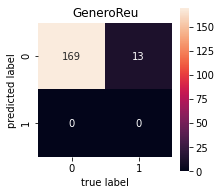

In [ ]:
mat = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3,3))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Male','Female'], yticklabels=['Male','Female'])

plt.tick_params(labelsize=15)
plt.title(classe)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.show()

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True, normalize=True)

Predicted,0,All
True,,
0,0.928571,0.928571
1,0.071429,0.071429
All,1.000000,1.000000


#### ROC Curve

search or discard??

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)


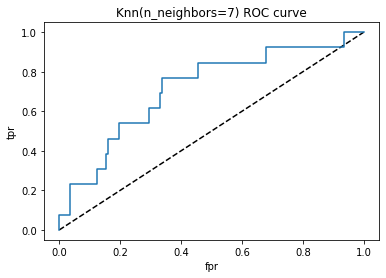

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve

metrics.roc_auc_score(y_test,y_pred_proba)

0.7123350022758307